## Problem Statment : Toyota Corolla

### Steps
##### 1:EDA
##### 2:Model(MLR) building
##### 3:VIF and Collinearity Remedy if there is collinearity
##### 4:Model Validation(QQ plot,Residual plot,Residual vs Regression)
##### 5:Model Deletion Diagonistic(Cooks Distance)
##### 6: Predicting New Data

### 1:EDA

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas_profiling as pp

In [3]:
toyota_cars = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
toyota_cars.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [4]:
toyota_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
#Considering only above variables in df
tcars = toyota_cars[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
tcars.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
tcars.info()
#there is no na values and dtype is also proper

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
tcars.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [10]:
tcars_1 = tcars.rename({'Age_08_04':'Age'},axis=1)
tcars_1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [12]:
tcars_1[tcars_1.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [13]:
tcars_1 = tcars_1.drop_duplicates()

In [15]:
tcars_1.reset_index()
tcars_1.info()
print(' \n No. of duplicates ' , tcars_1.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age            1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB
No. of duplicates  0


In [17]:
report = pp.ProfileReport(tcars_1)
report.to_widgets()

<AxesSubplot:>

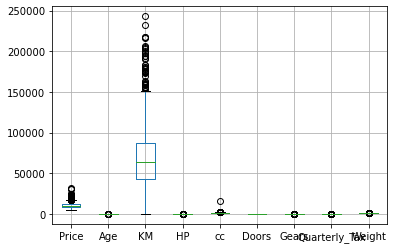

In [21]:
tcars_1.boxplot()
#We cant remove outliers individually for single variable as each datapoints has its importance

##### correlation Analysis

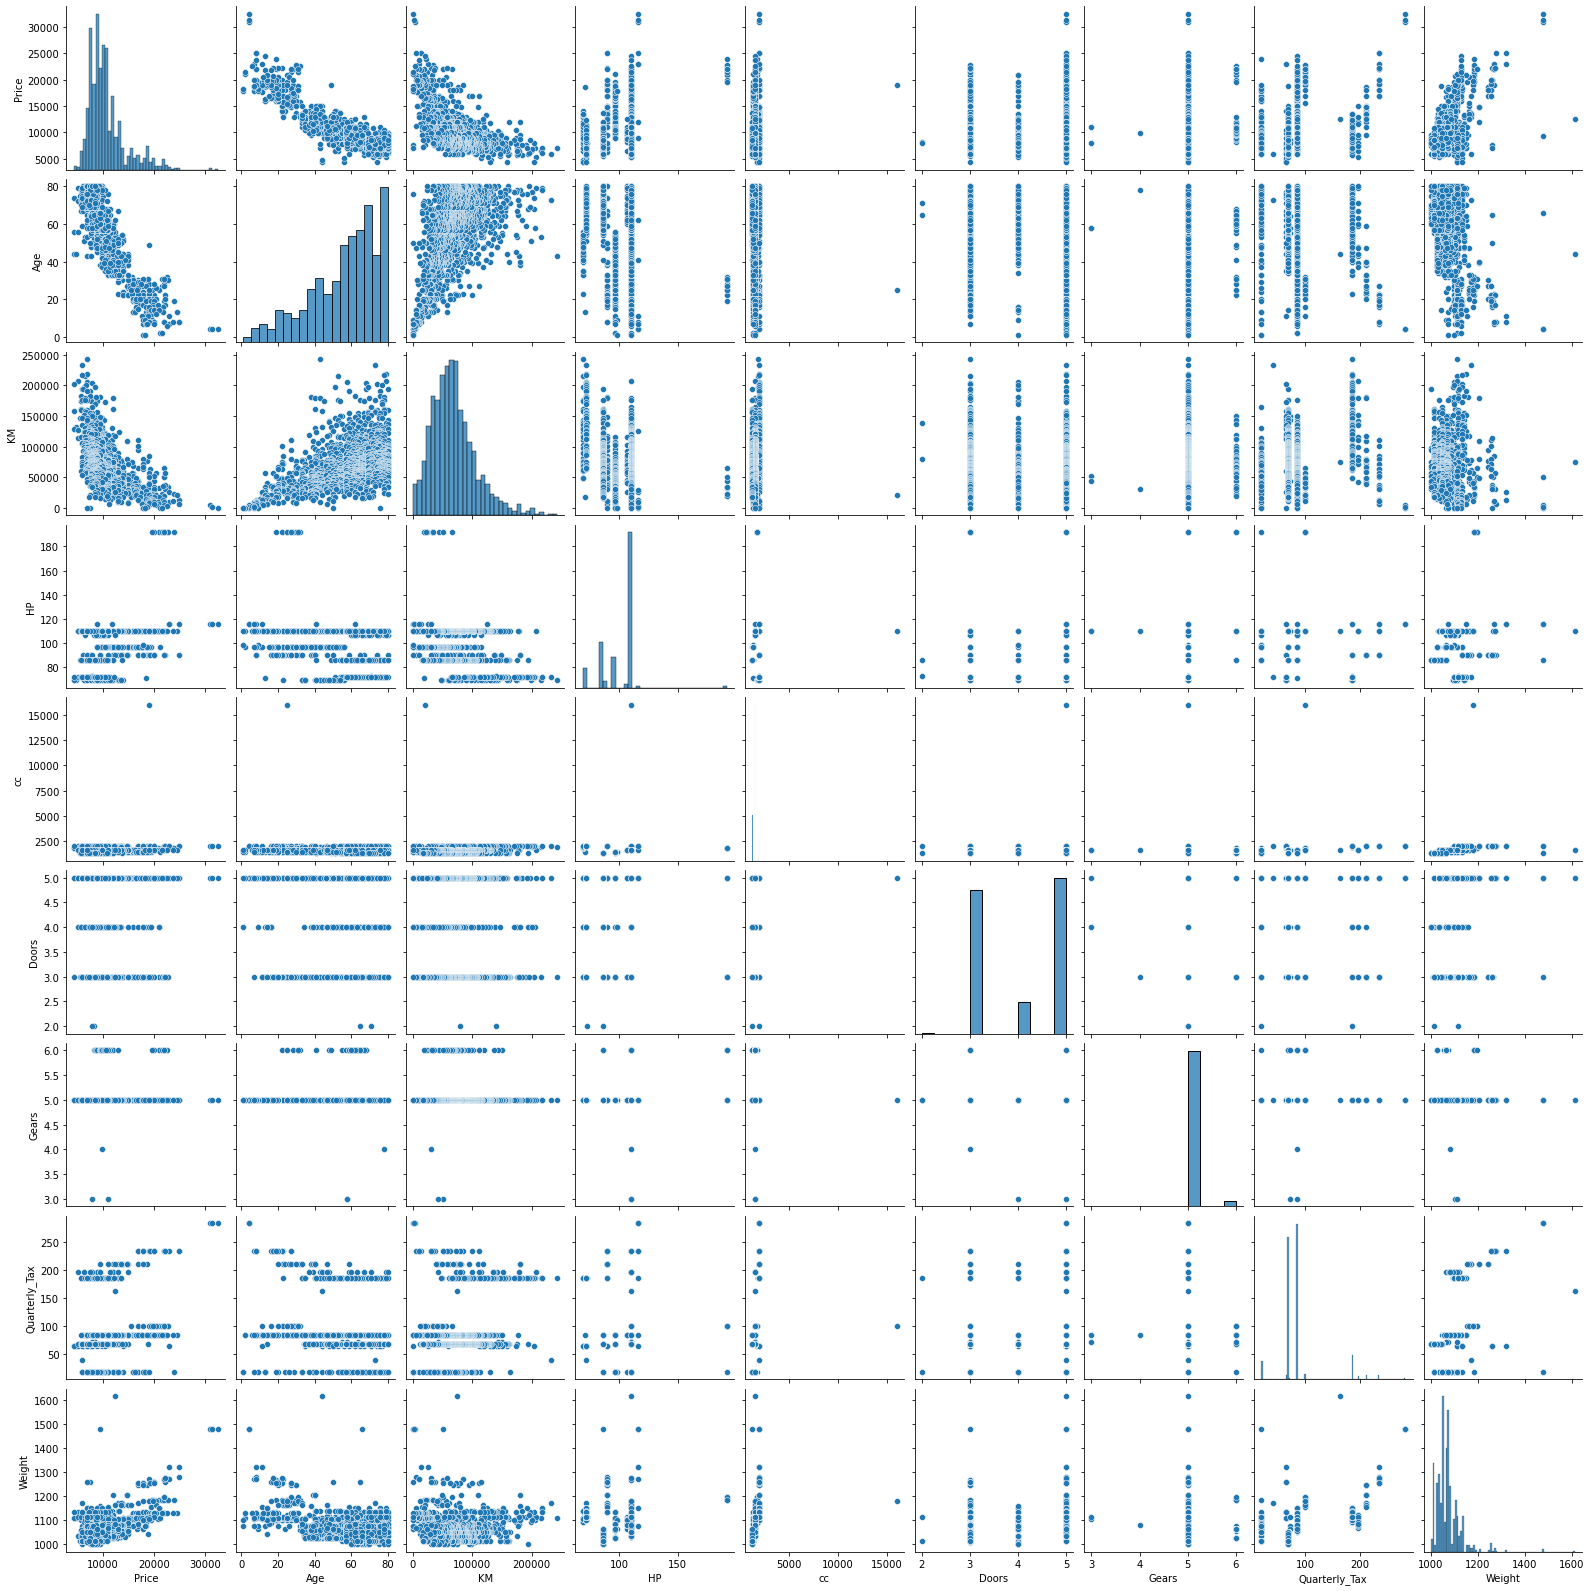

In [22]:
sns.pairplot(tcars_1)

In [23]:
tcars_1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


### 2:Model(MLR) building

In [26]:
initial_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = tcars_1).fit()
initial_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:55:50   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
print('Initial Model values \n\n\n Parameters ',initial_model.params,'\n\n','R square value',initial_model.rsquared,'\n\n','R square adjucent value',initial_model.rsquared_adj,'\n\n','P value',np.round(initial_model.pvalues,5))

Initial Model values 


 Parameters  Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64 

 R square value 0.8625200256947 

 R square adjucent value 0.8617487495415146 

 P value Intercept        0.00011
Age              0.00000
KM               0.00000
HP               0.00000
cc               0.18824
Doors            0.98164
Gears            0.00245
Quarterly_Tax    0.00329
Weight           0.00000
dtype: float64


In [29]:
tcars_1['Gears'].value_counts()

5    1389
6      43
3       2
4       1
Name: Gears, dtype: int64

###### As in the correlation matrix the correlation btwn cc and Doors is less and the same result is shown in the regression model where p value is greater than 0.05 so we can perform SLR before check once with vif

In [50]:
#simple Linear Regression
ml_d = smf.ols('Price~Doors',data = tcars).fit()
ml_d.rsquared,ml_d.rsquared_adj,round(ml_d.pvalues,5)

(0.03434555943109785,
 0.03367216023962727,
 Intercept    0.0
 Doors        0.0
 dtype: float64)

In [51]:
ml_cc = smf.ols('Price~cc',data = tcars).fit()
ml_cc.rsquared,ml_cc.rsquared_adj,round(ml_cc.pvalues,5)

(0.01597422921332259,
 0.015288018773443546,
 Intercept    0.0
 cc           0.0
 dtype: float64)

In [52]:
ml_half = smf.ols('Price~cc+Doors+Age_08_04+KM+HP+Gears',data = tcars).fit()
ml_half.rsquared,ml_half.rsquared_adj,round(ml_half.pvalues,5)

(0.817345037547313,
 0.8165781167812416,
 Intercept    0.00000
 cc           0.00000
 Doors        0.00000
 Age_08_04    0.00000
 KM           0.00000
 HP           0.00000
 Gears        0.00044
 dtype: float64)

In [53]:
ml_all = smf.ols('Price~cc+Doors+Age_08_04+KM+HP+Gears+Weight+Quarterly_Tax',data = tcars).fit()
ml_all.rsquared,ml_all.rsquared_adj,round(ml_all.pvalues,5)

(0.8637627463428192,
 0.8629989775766963,
 Intercept        0.00008
 cc               0.17909
 Doors            0.96777
 Age_08_04        0.00000
 KM               0.00000
 HP               0.00000
 Gears            0.00261
 Weight           0.00000
 Quarterly_Tax    0.00262
 dtype: float64)

In [54]:
#when we run seperately for cc and Doors p_value is < 0.05 but when we start including other variable the r2 adjucent get inrease which impact that none of the variables have any influence on the modle building

### 3:VIF and Collinearity Remedy if there is collinearity

In [37]:
#vif=1/(1-r2) Function to calculate variance influnce factor
def influence_factor(r):
    return 1/(1-r)

In [46]:
#func to form x equation
def form_eq(array):
    eq = ''
    for n in np.arange(len(array)):
        if eq == '':
            eq=array[n]
        else:
            eq=eq+'+'+array[n]
    return eq

#func to call MLR ols func to calculate vif value
def model_call(x,y):
    print(y)
    print(form_eq(x))
    equat = y+'~'+form_eq(x)
    r=smf.ols(equat,data = tcars_1).fit().rsquared
    vif=influence_factor(r)
    return vif

array = ['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
listOfVif = ''
var =[]
vifvalue =[]
for i in np.arange(len(array)):
    y = array[i]
    x1 = array[i+1:len(array)]
    x2 = array[:i]   
    x=x1+x2
    vif = model_call(x,y)
    var.append(y)
    vifvalue.append(vif)
    print(y,'-----',vif,'\n')
#strng to integer concat is a+str(8)


Age
KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight
Age ----- 1.8762358497682892 

KM
HP+cc+Doors+Gears+Quarterly_Tax+Weight+Age
KM ----- 1.75717802398104 

HP
cc+Doors+Gears+Quarterly_Tax+Weight+Age+KM
HP ----- 1.4191801087182137 

cc
Doors+Gears+Quarterly_Tax+Weight+Age+KM+HP
cc ----- 1.1634703645940854 

Doors
Gears+Quarterly_Tax+Weight+Age+KM+HP+cc
Doors ----- 1.155889865814207 

Gears
Quarterly_Tax+Weight+Age+KM+HP+cc+Doors
Gears ----- 1.0988429081631146 

Quarterly_Tax
Weight+Age+KM+HP+cc+Doors+Gears
Quarterly_Tax ----- 2.295374508985715 

Weight
Age+KM+HP+cc+Doors+Gears+Quarterly_Tax
Weight ----- 2.4871800071791856 



In [48]:
formdf = {'variables':var,'Vif_values':vifvalue}
vif_df = pd.DataFrame(formdf)
vif_df

,variables,Vif_values
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


### 4:Model Validation(QQ plot,Residual plot,Residual vs Regression)

#### QQ plot

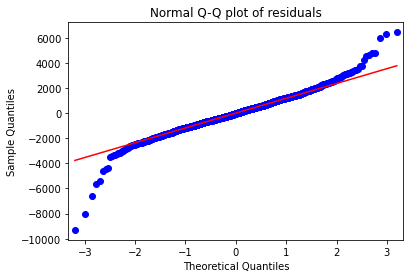

In [59]:
sm.qqplot(initial_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [61]:
# Finding outliers on both side
list(np.where(initial_model.resid > 6000))

[array([109, 146, 522], dtype=int64)]

In [62]:
list(np.where(initial_model.resid < -6000))

[array([220, 600, 959], dtype=int64)]

#### Residual plot error vs predicted value

In [67]:
def stand_fun(val):
    return (val-val.mean())/val.std()

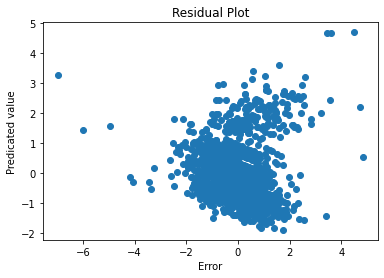

In [70]:
plt.scatter(stand_fun(initial_model.resid),stand_fun(initial_model.fittedvalues))
plt.title('Residual Plot')
plt.xlabel('Error')
plt.ylabel('Predicated value')
plt.show()

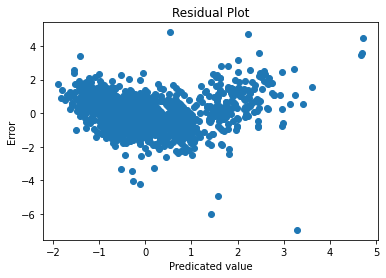

In [71]:
plt.scatter(stand_fun(initial_model.fittedvalues),stand_fun(initial_model.resid))
plt.ylabel('Error')
plt.xlabel('Predicated value')
plt.title('Residual Plot')
plt.show()

#### residual vs Regression

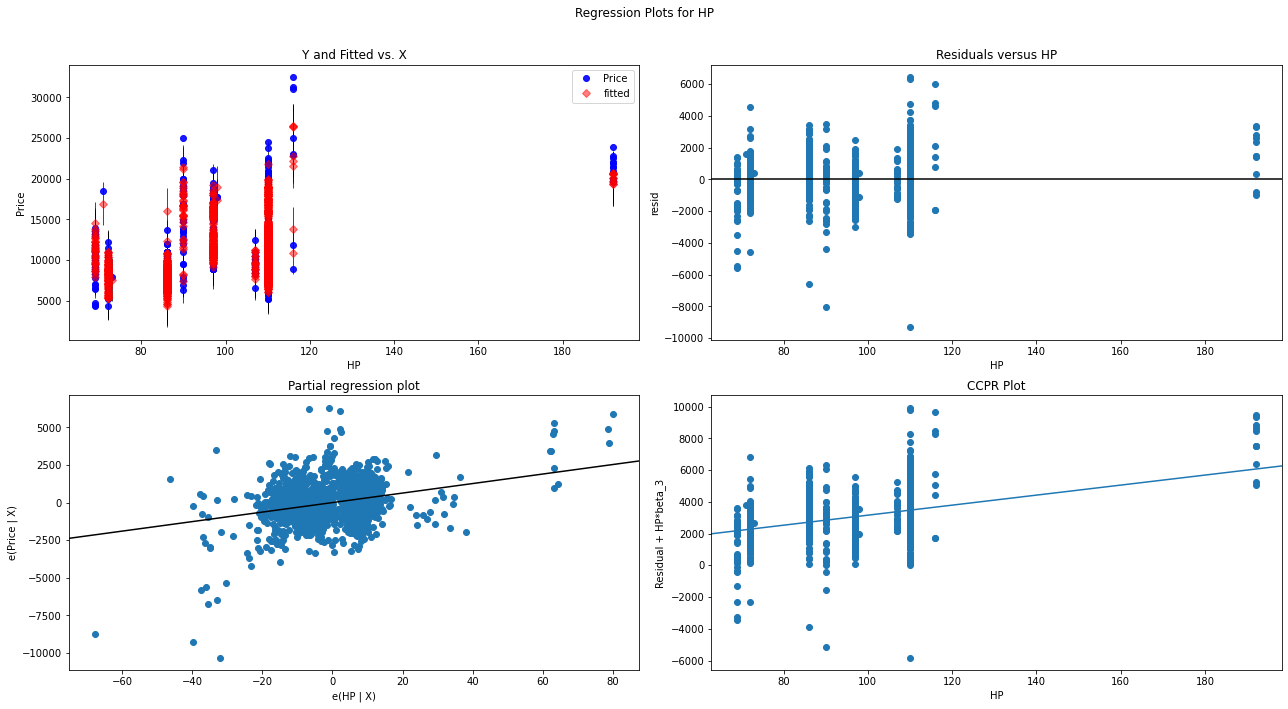

In [73]:
f = plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(initial_model,'HP',f)
plt.show()

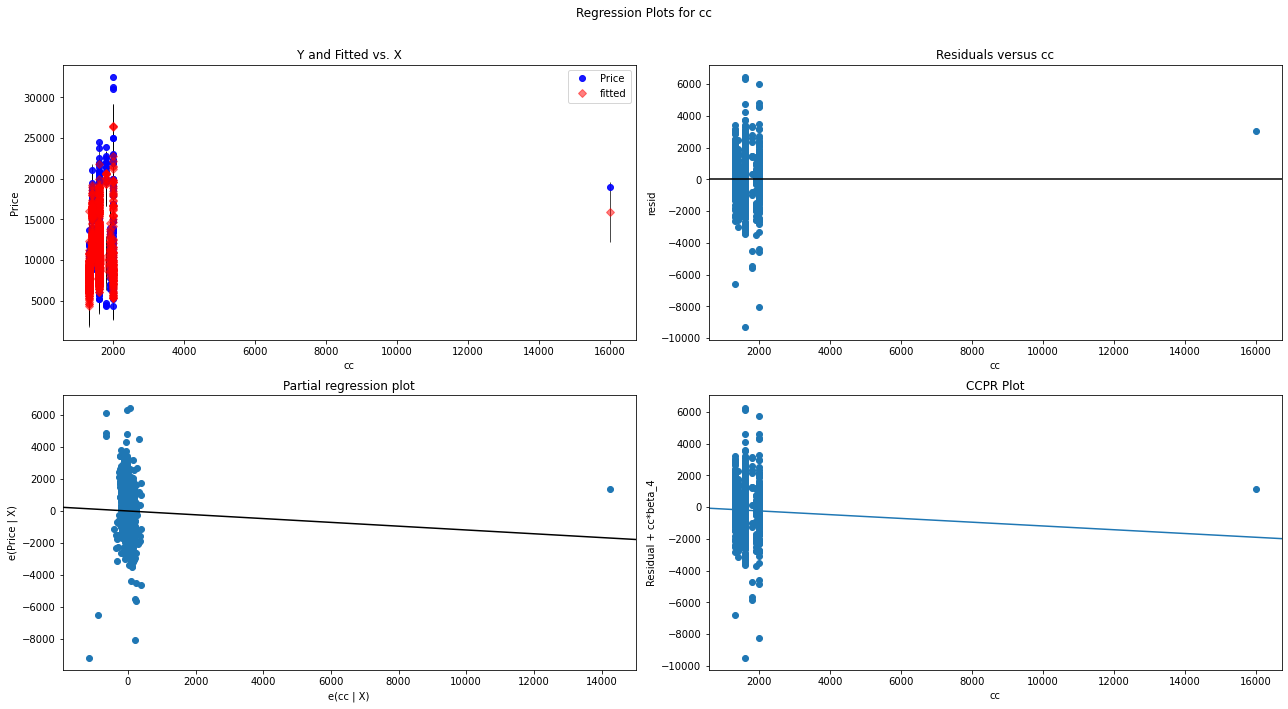

In [75]:
f = plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(initial_model,'cc',f)
plt.show()

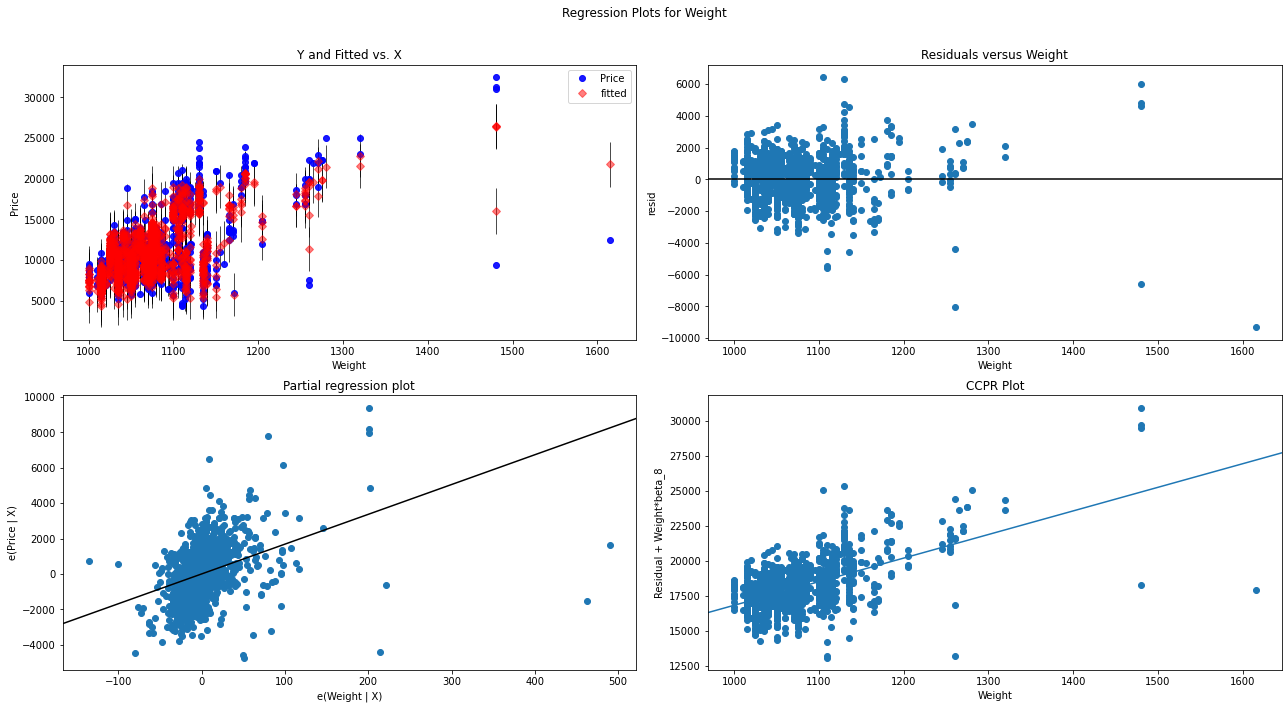

In [76]:
f = plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(initial_model,'Weight',f)
plt.show()

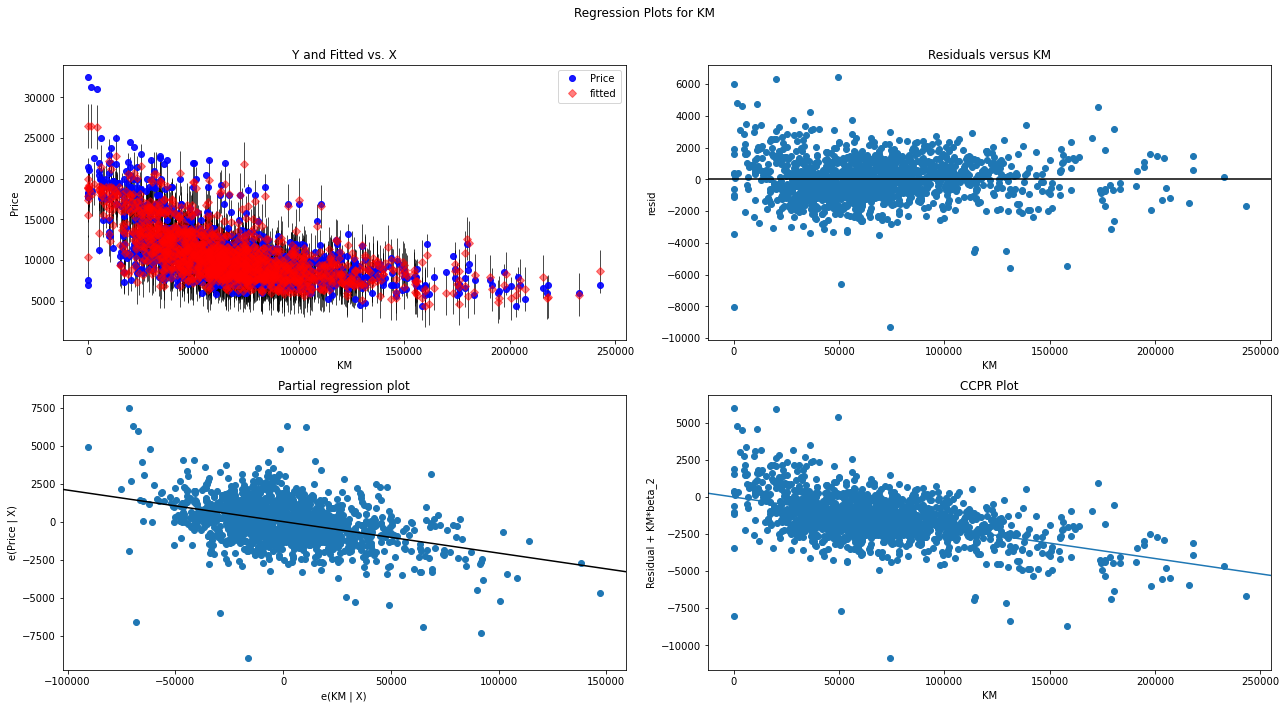

In [77]:
f = plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(initial_model,'KM',f)
plt.show()

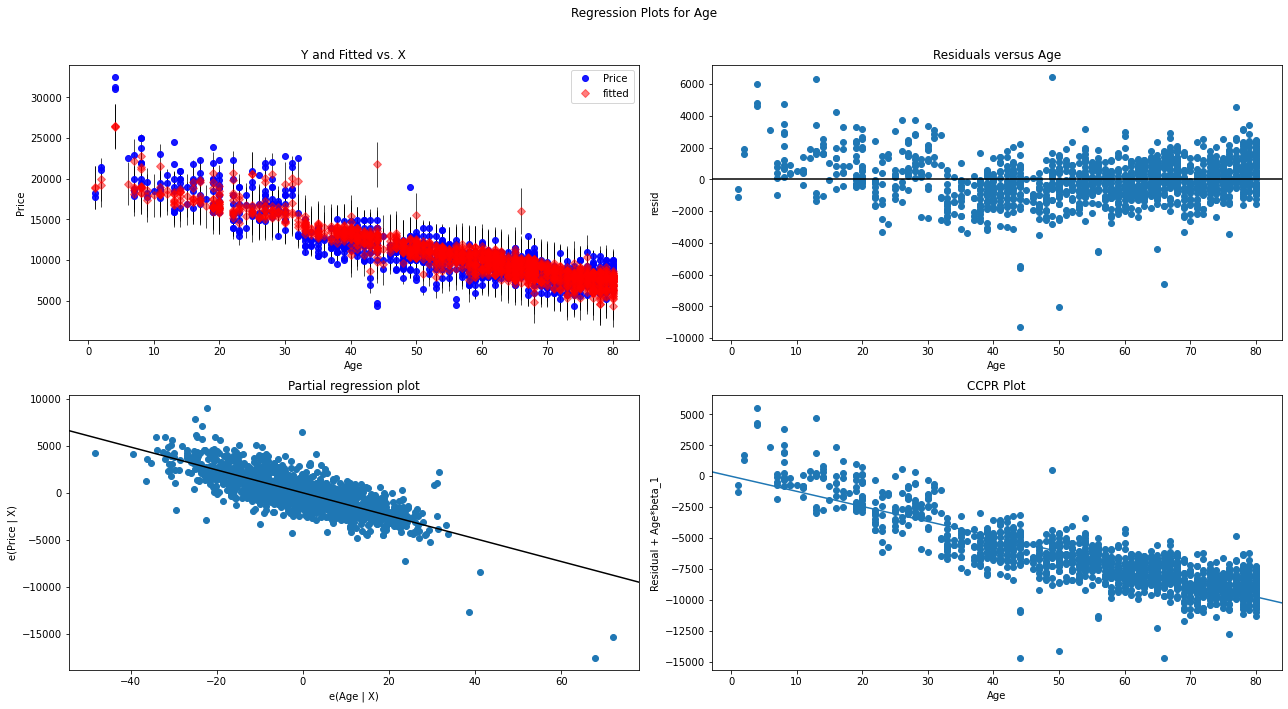

In [78]:
f = plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(initial_model,'Age',f)
plt.show()

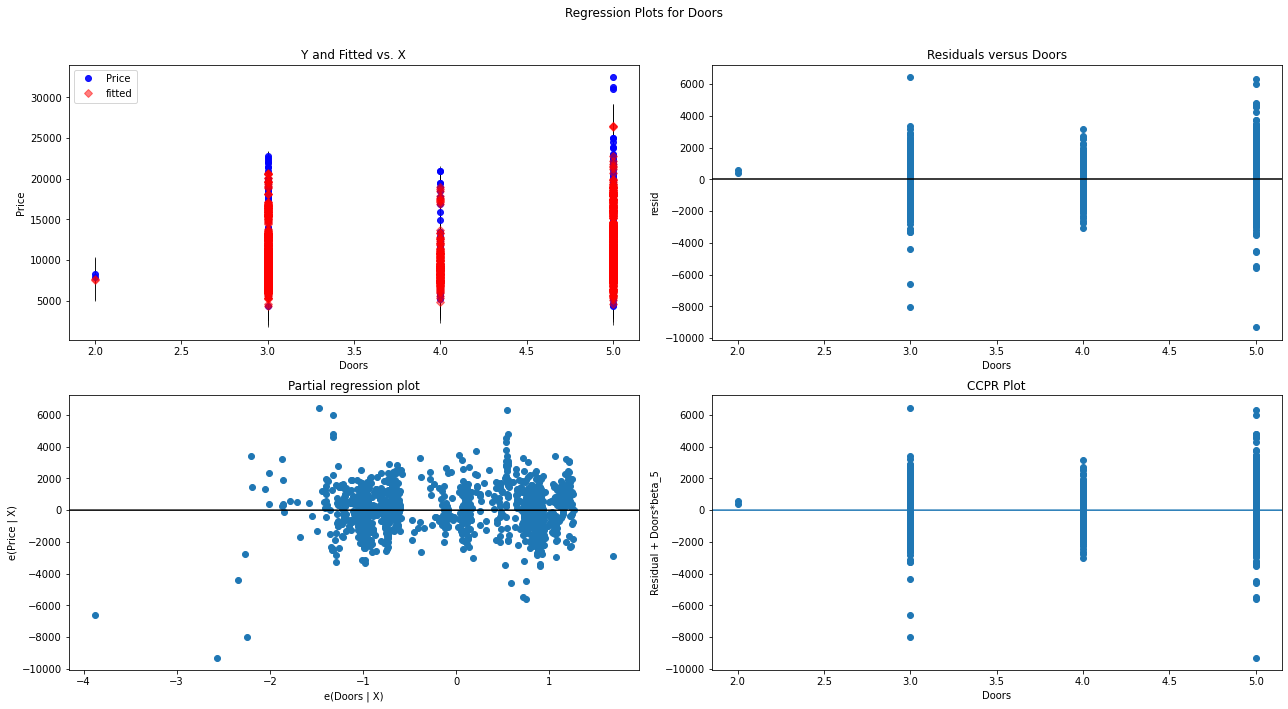

In [79]:
f = plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(initial_model,'Doors',f)
plt.show()

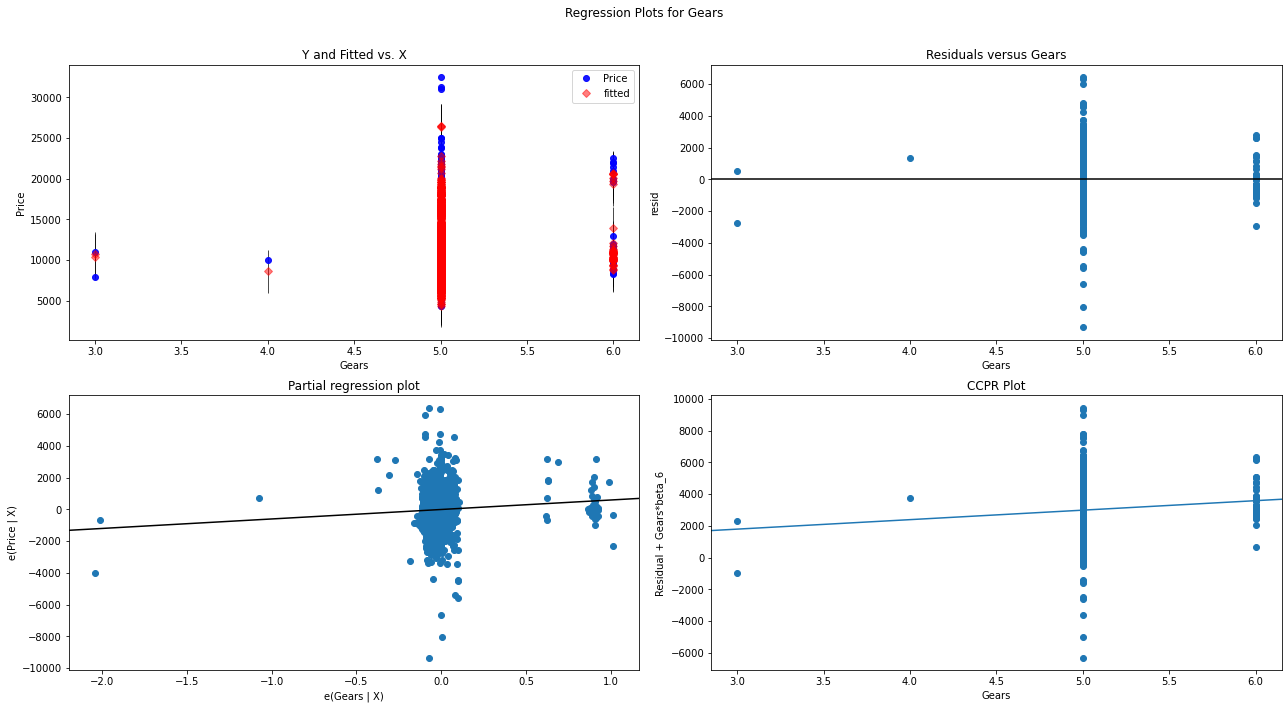

In [80]:
f = plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(initial_model,'Gears',f)
plt.show()

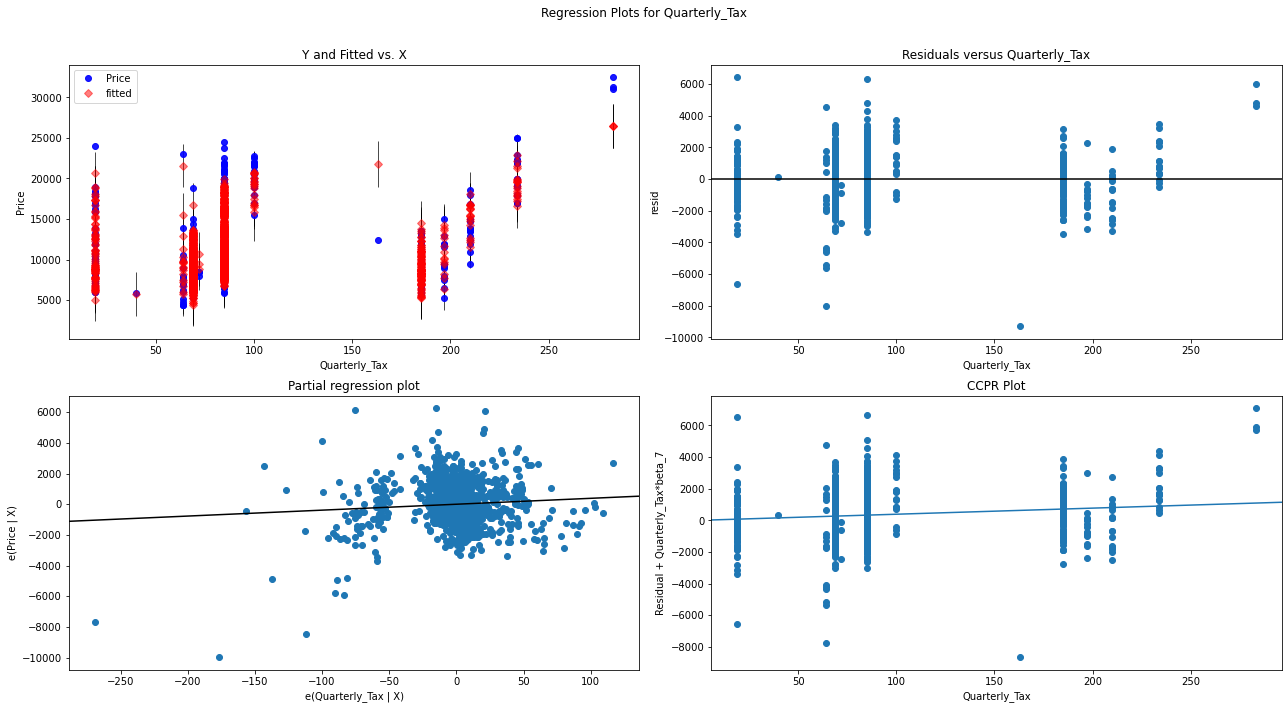

In [81]:
f = plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(initial_model,'Quarterly_Tax',f)
plt.show()

In [ ]:
#for all the variables above in the residual vs regression plot the error vs variable plot is constant for all values and no pattern also

### 5:Model Deletion Diagonistic(Cooks Distance)

In [83]:
model_influence = initial_model.get_influence()

In [84]:
(c,_) = model_influence.cooks_distance

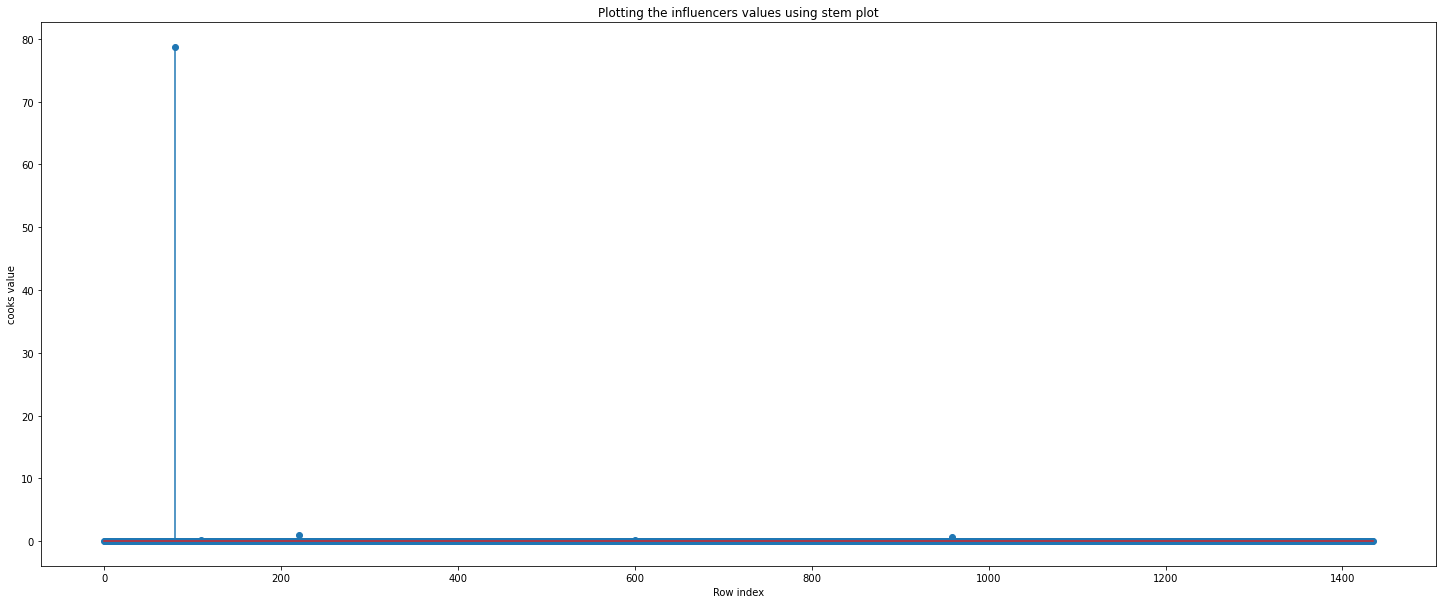

In [91]:
plt.subplots(figsize=(25,10))
plt.stem(np.arange(len(tcars_1)),np.round(c, 5))
plt.title('Plotting the influencers values using stem plot')
plt.xlabel('Row index')
plt.ylabel('cooks value')
plt.show()


##### 

In [92]:
np.max(c),np.argmax(c)

(78.7295058224851, 80)

In [102]:
tcars_2 = tcars_1.copy()

while np.max(c) > 1:
    print('Maximum Cooks value in Model ----', np.max(c))
    print('Index to drop from Df---',np.argmax(c))
    if any(tcars_2.index.isin([np.argmax(c)])):
        tcars_2 = tcars_2.drop(tcars_2.index[np.argmax(c)],axis=0).reset_index(drop=True)
        print('Index dropped from Df---',np.argmax(c))
        finalmodel = smf.ols('Price~cc+Doors+Age+KM+HP+Gears+Weight+Quarterly_Tax',data=tcars_2).fit()
        (c,_) = finalmodel.get_influence().cooks_distance
    else:
        print('Index not found need to break this loop')
print('Final Index ',np.argmax(c),'Cooks Value',np.max(c))  
print('R squared value',finalmodel.rsquared,'\n\n R squared adj',finalmodel.rsquared_adj,'\n\n p_values',finalmodel.pvalues)

Maximum Cooks value in Model ---- 78.7295058224851
Index to drop from Df--- 80
Index dropped from Df--- 80
Maximum Cooks value in Model ---- 2.225351365526629
Index to drop from Df--- 219
Index dropped from Df--- 219
Maximum Cooks value in Model ---- 2.5307796232781126
Index to drop from Df--- 957
Index dropped from Df--- 957
Final Index  598 Cooks Value 0.3168903540145508
R squared value 0.8839684606741538 R squared adj 0.8833161400033128 p_values Intercept         1.019465e-23
cc                3.926374e-34
Doors             1.168890e-03
Age              3.502630e-277
KM                1.517857e-42
HP                3.573157e-38
Gears             1.005269e-02
Weight           3.726261e-104
Quarterly_Tax     1.701742e-04
dtype: float64


In [105]:
tcars_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1432 non-null   int64
 1   Age            1432 non-null   int64
 2   KM             1432 non-null   int64
 3   HP             1432 non-null   int64
 4   cc             1432 non-null   int64
 5   Doors          1432 non-null   int64
 6   Gears          1432 non-null   int64
 7   Quarterly_Tax  1432 non-null   int64
 8   Weight         1432 non-null   int64
dtypes: int64(9)
memory usage: 100.8 KB


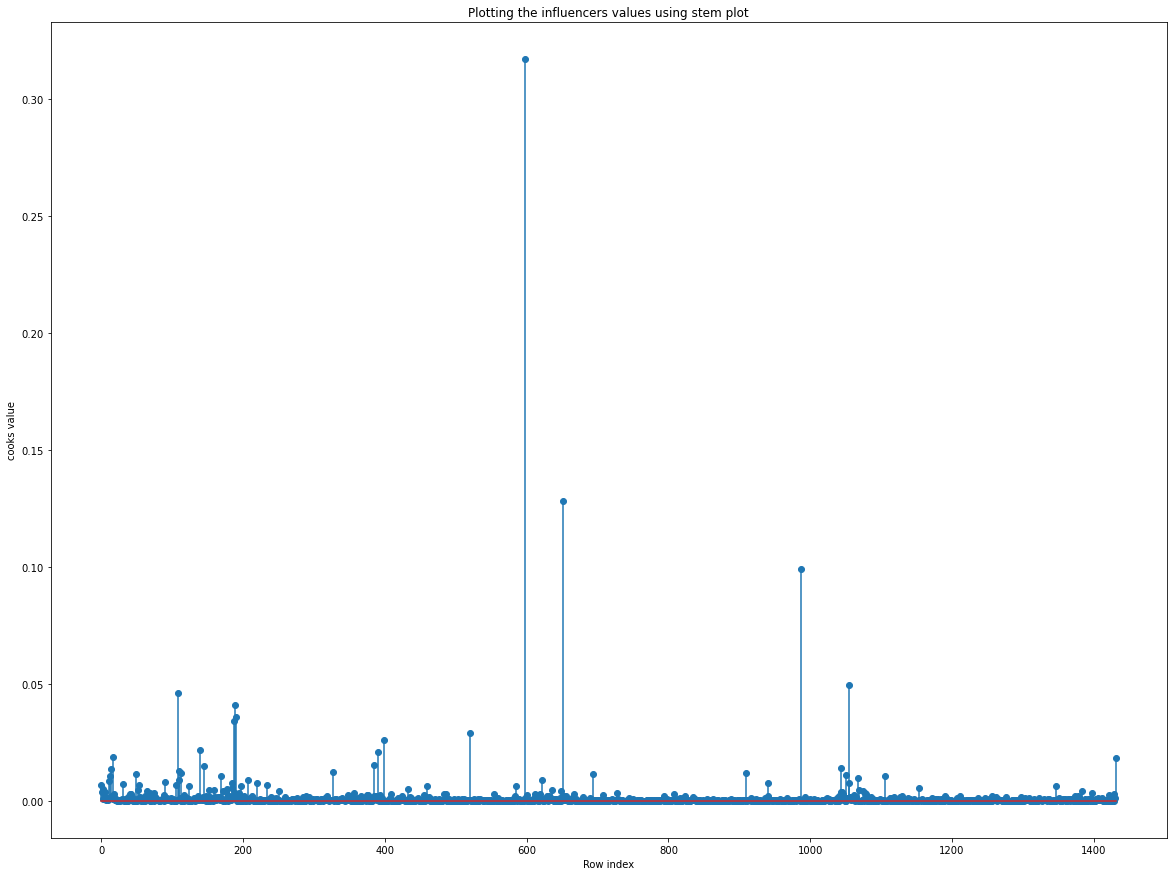

In [106]:
plt.subplots(figsize=(20,15))
plt.stem(np.arange(len(tcars_2)),np.round(c,5))
plt.title('Plotting the influencers values using stem plot')
plt.xlabel('Row index')
plt.ylabel('cooks value')
plt.show()


In [ ]:
#### Since the cooks value is <1 , we can stop the diagnostic process and finalize the model

In [111]:
finalmodel = smf.ols('Price~cc+Doors+Age+KM+HP+Gears+Weight+Quarterly_Tax',data=tcars_2).fit()

In [114]:
print('\n\n Cooks Value',np.max(c),'\n\n R squared value',finalmodel.rsquared,'\n\n Aic value',finalmodel.aic,'\n\n R squared adj',finalmodel.rsquared_adj,'\n\n p_values',np.round(finalmodel.pvalues,4))



 Cooks Value 0.3168903540145508 

 R squared value 0.8839684606741538 

 Aic value 24453.23573612724 

 R squared adj 0.8833161400033128 

 p_values Intercept        0.0000
cc               0.0000
Doors            0.0012
Age              0.0000
KM               0.0000
HP               0.0000
Gears            0.0101
Weight           0.0000
Quarterly_Tax    0.0002
dtype: float64


In [123]:
#Model is improved to 88.39% i.e predicted value is 88.39 accuracy

### 6: Predicting New Data

In [120]:
new_data=pd.DataFrame({'HP':40,"Weight":95,"Quarterly_Tax":1035,"Gears":4,"KM":34000,"Age":40,"cc":1040,"Doors":3},index=[1])
new_data


,HP,Weight,Quarterly_Tax,Gears,KM,Age,cc,Doors
1,40,95,1035,4,34000,40,1040,3


In [121]:
finalmodel.predict(new_data)

1   -12455.428354
dtype: float64

In [122]:
#comparison of actual value and predicted value for testing purpose
actual_value = tcars_2.Price.iloc[0:10]
predicted_value = finalmodel.predict(tcars_2.iloc[0:10])
listDetails = {'actual_value':actual_value,'predicted_value':predicted_value}
listOf = pd.DataFrame(listDetails)
listOf

,actual_value,predicted_value
0,13500,16326.634426
1,13750,15886.220972
2,13950,16304.093367
3,14950,15973.237208
4,13750,15839.043084
5,12950,15233.070648
6,16900,17515.456249
7,18600,17497.014923
8,21500,20869.519273
9,12950,13564.153131
